# 비지도학습 과제
### 전처리 2차시에서 진행한 실습에서 이어지는 내용입니다.
### 2차시에서 최종적으로 저장한 hyundi_preprocessed.csv 파일을 활용해 비지도학습 클러스터링을 진행합니다.

### 파일 불러오기

In [1]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('/content/sample_data/hyundi_preprocessed.csv', index_col=0)

In [5]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,7,2017,7999,0,17307,0,145.0,58.9,1.2
1,12,2016,14499,2,25233,2,235.0,43.5,2.0
2,12,2016,11399,0,37877,2,30.0,61.7,1.7
3,5,2016,6499,0,23789,0,20.0,60.1,1.0
4,6,2015,10199,0,33177,2,160.0,51.4,2.0
...,...,...,...,...,...,...,...,...,...
4854,15,2019,29995,3,1567,2,145.0,39.8,2.2
4856,9,2015,7830,0,59508,2,30.0,65.7,1.7
4857,5,2017,6830,0,13810,0,20.0,60.1,1.0
4858,12,2018,13994,0,23313,0,145.0,44.8,1.6


# 지금부터 df를 활용해 K-means Clustering을 진행하시면 됩니다.
* 다양한 클러스터를 만들며, 클러스터링에 익숙해지는 자유도 높은 과제 입니다.
* 비지도학습 K-means Clustering 강의 및 자료를 활용해 현대 중고차에 대한 클러스터링 분석을 자유롭게 진행해보세요.
* 분석을 위해 모든 열을 다 사용해도 되고, 몇 가지 열을 골라서 진행해도 됩니다!

In [6]:
# 분석을 진행할 열 3개를 가져옵니다.
df_new = df[['price','year','mileage']]

df_new

,price,year,mileage
0,7999,2017,17307
1,14499,2016,25233
2,11399,2016,37877
3,6499,2016,23789
4,10199,2015,33177
...,...,...,...
4854,29995,2019,1567
4856,7830,2015,59508
4857,6830,2017,13810
4858,13994,2018,23313


In [7]:
from sklearn.cluster import KMeans

# KMeans 클러스터링 모델 생성
km = KMeans(n_clusters=3,
            init ='random',
            n_init = 10,
            max_iter = 300,
            tol = 1e-04,
            random_state=0
           )

# 클러스터링 수행
y_km = km.fit_predict(df_new) # ****부분을 적절한 값으로 교체해주세ㅛㅇ.

# 클러스터링 결과 출력
df_new['cluster_label'] = y_km
print(df_new)

      price  year  mileage  cluster_label
0      7999  2017    17307              1
1     14499  2016    25233              0
2     11399  2016    37877              0
3      6499  2016    23789              0
4     10199  2015    33177              0
...     ...   ...      ...            ...
4854  29995  2019     1567              1
4856   7830  2015    59508              2
4857   6830  2017    13810              1
4858  13994  2018    23313              0
4859  15999  2016    11472              1

[4592 rows x 4 columns]


<ipython-input-7-d23d520e4224>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['cluster_label'] = y_km


In [8]:
# 클러스터 중심점 확인
centers = km.cluster_centers_ # 중심을 확인하는 코드를 넣어주세요

centers

array([[10729.16575923,  2016.40653358, 29905.9092559 ],
       [14975.66877221,  2018.12791157,  9088.58823529],
       [ 8117.26600985,  2014.00492611, 60669.93103448]])

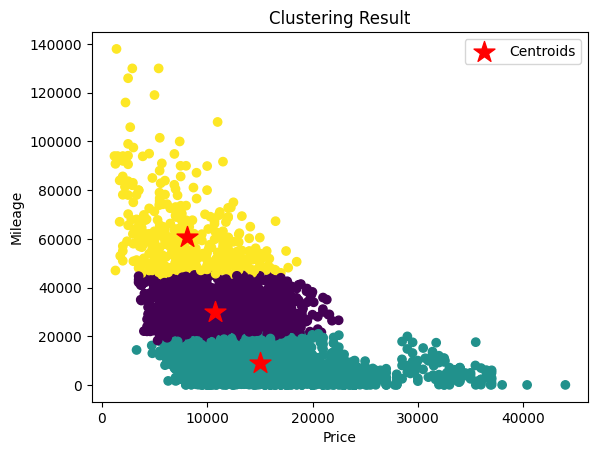

In [9]:
# 클러스터링 결과 시각화
import matplotlib.pyplot as plt

# 4800여개의 데이터를 점 찍는 작업입니다.
plt.scatter(x =df_new['price'], y =df_new['mileage'] , c=y_km, cmap='viridis')  # x, y, c에 값을 집어넣어주세요

# 각 cluster의 중심을 점 찍는 작업입니다.
plt.scatter(x=km.cluster_centers_[:,0], y=km.cluster_centers_[:,2], marker='*', s=250, color='red', label='Centroids') # x,y에 값을 집어넣어주세요

plt.xlabel('Price')
plt.ylabel('Mileage')
plt.title('Clustering Result')
plt.legend()
plt.show()

# 아래부터는 배운 내용을 바탕으로 다양한 cluster 분석을 진행해주세요.

PCA를 활용한 clustering

--



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


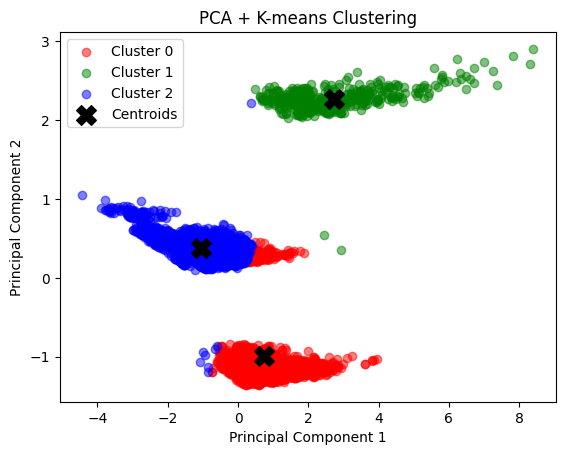

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

df = df_new

# 데이터 표준화 (Standardization)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# PCA 수행
pca = PCA(n_components=2)  # 주성분 2개 추출
pca_result = pca.fit_transform(scaled_data)

# K-means 클러스터링 수행
k = 3  # 원하는 클러스터 개수
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(pca_result)
cluster_centers = kmeans.cluster_centers_

# 클러스터 시각화
colors = ['red', 'green', 'blue']
for i in range(k):
    plt.scatter(pca_result[labels == i, 0], pca_result[labels == i, 1], c=colors[i], label=f'Cluster {i}', alpha=0.5)

# 클러스터 중심점 시각화
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', marker='X', s=200, label='Centroids')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA + K-means Clustering')
plt.legend()
plt.show()

HierarchicalClustering


In [20]:
from scipy.spatial.distance import pdist, squareform

row_dist = pd.DataFrame(squareform(
                        pdist(df_new, metric='euclidean')),
                        )
row_dist

,0,1,2,3,4,5,6,7,8,9,...,4582,4583,4584,4585,4586,4587,4588,4589,4590,4591
0,0.000000,10250.437942,20849.098350,6653.294372,16021.763480,24413.196309,22272.350684,14396.459669,20913.168746,5575.010942,...,3882.203240,982.642356,8456.001005,2642.681025,18255.307913,27047.580668,42201.338450,3687.217108,8485.992164,9901.879923
1,10250.437942,0.000000,13018.476716,8129.276475,9033.113361,18418.479579,16253.633348,5075.873225,13487.283084,4822.536366,...,13698.911709,10361.308894,17625.888488,12742.583372,9970.471654,28287.905225,34917.777578,13758.578851,1985.303251,13842.511405
2,20849.098350,13018.476716,0.000000,14915.821935,4850.773237,6465.139596,4893.761437,8077.804714,1020.798217,16880.298131,...,24729.306622,20434.079622,29224.919110,23467.712436,3078.692092,40794.942407,21923.456092,24496.862085,14793.381121,26802.686918
3,6653.294372,8129.276475,14915.821935,0.000000,10090.814883,17864.428958,15760.855465,10083.804887,14815.527429,6307.259389,...,10380.377161,5951.428904,15012.723437,9028.256033,12713.714524,32340.057359,35743.790048,9984.488169,7510.100199,15555.014947
4,16021.763480,9033.113361,4850.773237,10090.814883,0.000000,9391.178254,7220.588619,4927.182765,4909.076695,12320.546498,...,19903.844126,15589.189042,24425.640258,18631.943860,2931.713833,37297.100866,26437.354747,19657.844617,10568.847146,22466.575774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4587,27047.580668,28287.905225,40794.942407,32340.057359,37297.100866,46639.882311,44503.200256,32788.701026,41440.903019,26384.958651,...,25443.999803,28030.222439,23174.482885,26351.600843,37736.129889,0.000000,62035.850304,26201.302983,26998.528090,17146.342176
4588,42201.338450,34917.777578,21923.456092,35743.790048,26437.354747,17936.943134,19987.608311,29894.337758,21579.463617,38737.100175,...,46052.182478,41633.766957,50657.268817,44724.437503,24948.031866,62035.850304,0.000000,45708.940143,36716.112730,48725.659144
4589,3687.217108,13758.578851,24496.862085,9984.488169,19657.844617,27848.327885,25737.018767,18061.624041,24532.993030,8963.175051,...,757.304430,4085.787807,5094.006969,1045.650515,21934.181703,26201.302983,45708.940143,0.000000,11900.836399,9462.389022
4590,8485.992164,1985.303251,14793.381121,7510.100199,10568.847146,19944.663522,17756.992707,6990.007010,15200.242959,2939.041681,...,11803.083199,8699.815688,15656.865778,10901.103706,11782.740513,26998.528090,36716.112730,11900.836399,0.000000,12009.550824


In [21]:
from scipy.cluster.hierarchy import linkage

row_clusters = linkage(pdist(df, metric = 'euclidean'),
                       method = 'complete')

pd.DataFrame(row_clusters,
             columns = ['row label 1',
                        'row label 2',
                        'distance',
                        'no. of items in clust.'],
             index = ['cluster %d' %(i +1) for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,2759.0,2833.0,0.000000,2.0
cluster 2,1685.0,2533.0,0.000000,2.0
cluster 3,1572.0,1802.0,0.000000,2.0
cluster 4,160.0,161.0,0.000000,2.0
cluster 5,166.0,4577.0,0.000000,2.0
...,...,...,...,...
cluster 4587,9169.0,9174.0,43151.906285,1972.0
cluster 4588,9168.0,9175.0,52457.364192,418.0
cluster 4589,9176.0,9178.0,58432.254372,4162.0
cluster 4590,9177.0,9179.0,95522.786125,430.0


<ipython-input-22-e1ef643dfaa9>:26: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  W = np.hstack((eigen_vecs[:, i][:, np.newaxis] for i in range(num_pc)))


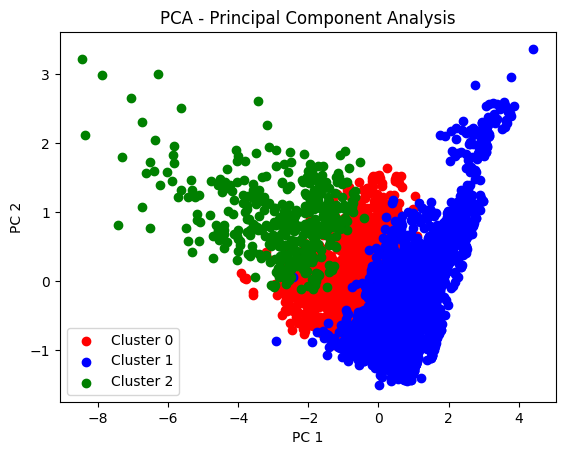

In [22]:
# PCA 방법

from sklearn.preprocessing import StandardScaler

# 'df_new' 데이터프레임 사용
# 'price', 'year', 'mileage' 열로 데이터셋 구성
X = df_new[['price', 'year', 'mileage']].values

# 표준화 전처리
sc = StandardScaler()
X_std = sc.fit_transform(X)

# 공분산 행렬 계산
cov_mat = np.cov(X_std.T)

# 고윳값 분해 수행
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

# 분산 비율 계산
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# 주성분 선택
num_pc = 2  # 주성분의 개수 (2차원 산점도를 그리기 위해 2개를 선택)
W = np.hstack((eigen_vecs[:, i][:, np.newaxis] for i in range(num_pc)))

# 데이터를 주성분으로 변환
X_pca = X_std.dot(W)

# 시각화
plt.scatter(X_pca[df_new['cluster_label'] == 0, 0], X_pca[df_new['cluster_label'] == 0, 1], label='cluster 1', c='blue')
plt.scatter(X_pca[df_new['cluster_label'] == 1, 0], X_pca[df_new['cluster_label'] == 1, 1], label='cluster 2', c='red')
plt.scatter(X_pca[df_new['cluster_label'] == 2, 0], X_pca[df_new['cluster_label'] == 2, 1], label='cluster 3', c='green')

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA - Principal Component Analysis')
plt.legend()
plt.show()